# Prediction of Obesity Risk - EDA

## Problem Statement

## Data Dictionary

# Import Libraries

In [35]:
import pandas as pd
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sb
# Configure default settings for plots
plt.rcParams['axes.spines.top'] = False    # Remove top border
plt.rcParams['axes.spines.right'] = False  # Remove right border
plt.style.use('fivethirtyeight')


# Load Data

In [2]:
data = pd.read_csv('../Data/Raw/train.csv')
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 20758 rows and 18 columns


In [3]:
# Creating a copy of the dataset in memory in case of misediting
df = data.copy()

# Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


## Check for Missing Values

In [7]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Check for Duplicates

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('id', axis=1).duplicated().sum()

0

## Summary Statistics

In [10]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20758.0,NaN,NaN,NaN,10378.5,5992.46278,0.0,5189.25,10378.5,15567.75,20757.0
Gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20758.0,NaN,NaN,NaN,23.841804,5.688072,14.0,20.0,22.815416,26.0,61.0
Height,20758.0,NaN,NaN,NaN,1.700245,0.087312,1.45,1.631856,1.7,1.762887,1.975663
Weight,20758.0,NaN,NaN,NaN,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,20758.0,NaN,NaN,NaN,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0
NCP,20758.0,NaN,NaN,NaN,2.761332,0.705375,1.0,3.0,3.0,3.0,4.0
CAEC,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA) and Visualization

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

## Univariate Analysis

In [13]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 9 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numeric columns: 9 ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


### Categorical Features

In [12]:
# Function to create labeled barplots for categorical features
def plot_counts(data, feature, perc=False, n=None, hue=None):
  """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - feature <string>: Name of categorical column in dataframe to be visualized.
    - perc <bool>: whether to display percentages instead of count (default is False)
    - n <int>: displays the top n category levels (default is None, i.e., display all levels)
  """

  total = len(data[feature])            # How many number of rows are there in the feature?
  num_unique = data[feature].nunique()  # How many unique number of category are there in the feature?

  # Set the size of the figure according to the number of categories to be displayed
  if n is None:
    plt.figure(figsize = (num_unique+1, 5))
  else:
    plt.figure(figsize = (n+1, 5))

  # Set the style of the ticks on x axis
  plt.xticks(rotation=90, fontsize=12)

  # Plot the counts for each category
  ax = sb.countplot(
      data=data,
      x = feature,
      palette = 'Paired',
      order = data[feature].value_counts().index[:n].sort_values(),
      hue = hue
  )

  # Display the percentage of each category on top of the bar
  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(
          100 * p.get_height() / total  # Display percentage of each class of the category
      )
    else:
      label = p.get_height() # Display count of each level of the category

    x = p.get_x() + p.get_width() / 2 # Width of the plot
    y = p.get_height() # Height of the plot

    rotation = 0
    if hue is not None:
      rotation = 30  # Rotate annotations by 30 degrees if hue is not None


    ax.annotate(
        label,
        (x, y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0, 5),
        textcoords = 'offset points',
        rotation = rotation
    )
  plt.show()

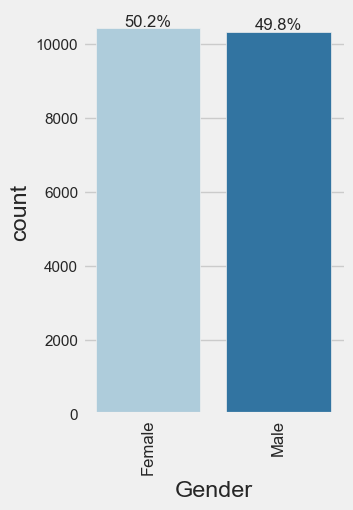

In [18]:
plot_counts(df, cat_cols[0], perc=True)

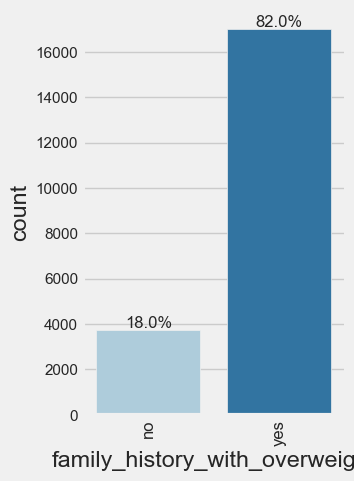

In [19]:
plot_counts(df, cat_cols[1], perc=True)

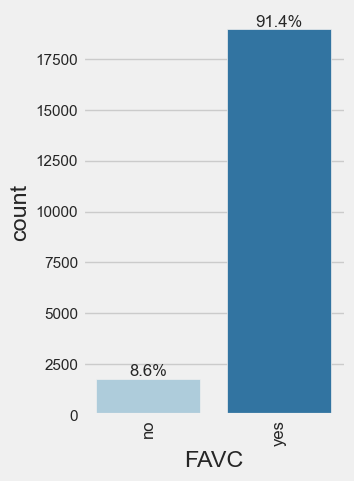

In [20]:
plot_counts(df, cat_cols[2], perc=True)

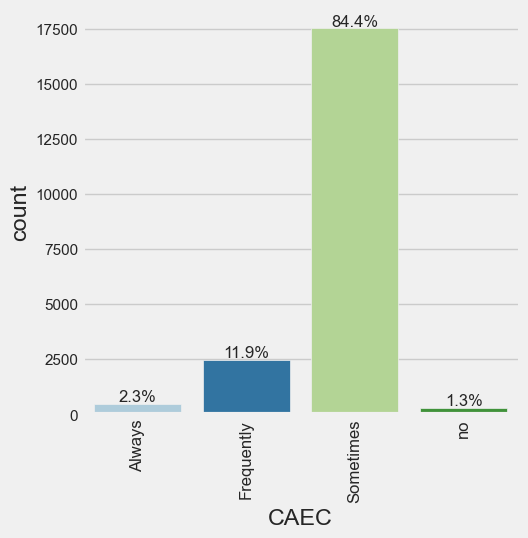

In [21]:
plot_counts(df, cat_cols[3], perc=True)

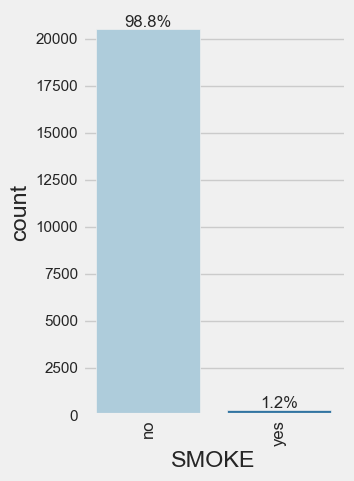

In [22]:
plot_counts(df, cat_cols[4], perc=True)

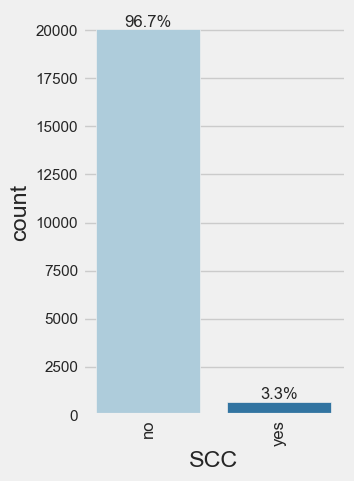

In [23]:
plot_counts(df, cat_cols[5], perc=True)

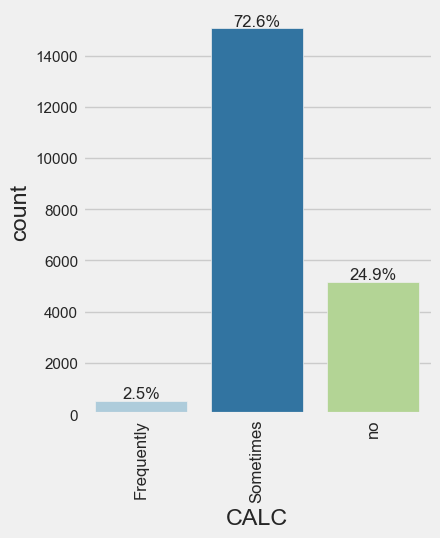

In [24]:
plot_counts(df, cat_cols[6], perc=True)

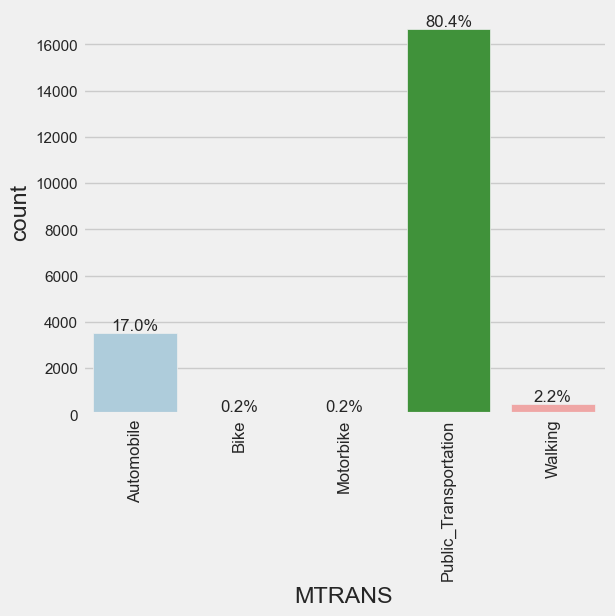

In [25]:
plot_counts(df, cat_cols[7], perc=True)

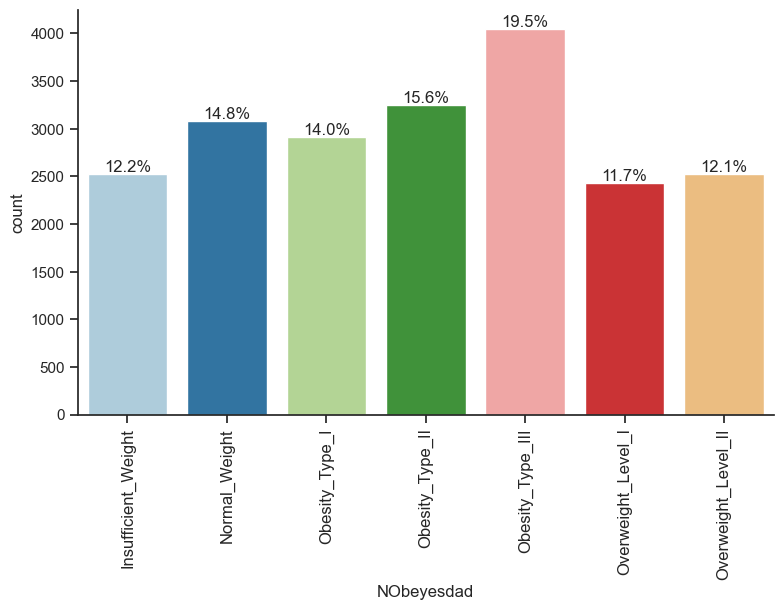

In [34]:
plot_counts(df, cat_cols[8], perc=True)

🔎 **Observations:** It's a balanced dataset.

### Numeric Features

We'll ignore the unique identifier column.

In [27]:
# A function to display the both the histogram and the boxplot of a numeric column
def dist_plot(data, feature):
  '''
        This function takes the name of the feature and
        plots the distribution of the numeric values
        both using boxplot and hisplot of seaborn.
        The purpose is to check if the numeric feature has
        normal distribution and detect outliers manualy.
        Skewness and kurtosis values of the data are also
        shown.

        ---
        ### Parameters
        - data <dataframe>: tabular data in data frame format.
        - feature <string>: Name of numeric column in dataframe to be visualized.
  '''

  # Create the canvas with 2 sub-plots in rows with 0.15 to 0.85 ratio
  fig, (ax_box, ax_hist) = plt.subplots(
      nrows = 2,
      sharex = True,
      gridspec_kw = {'height_ratios':(0.15, 0.84)},
      figsize = (12, 6)
  )

  # Add the boxblot to the canvas in the first row
  sb.boxplot(
      data = data,
      x = feature,
      color = 'lightblue',
      showmeans = True,
      ax = ax_box
  )
  ax_box.set_xlabel('') # Remove the label from the x axis of the boxplot

  sb.histplot(
      data = data,
      x = feature,
      kde = True,
      ax = ax_hist
  )
  ax_hist.set_xlabel('') # Remove the label from the x axis of the histogram

  # Calculate the skewness and kurtosis
  skewness = data[feature].skew()
  kurt = data[feature].kurt()
  # Add skewness and kurtosis as text on the histogram plot
  ax_hist.text(
      0.95, 0.85,
      f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}',
      transform = ax_hist.transAxes,
      verticalalignment = 'top',
      horizontalalignment = 'right',
      bbox = dict(facecolor='white', edgecolor='gray', boxstyle='round, pad=0.5')
  )

  # Calculcate mean and median values of the feature
  mean_value = data[feature].mean()
  median_value = data[feature].median()

  # Add these values as a vertical line to the histogram
  ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
  ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')

  # Add legends
  ax_hist.legend(loc='lower right')

  plt.suptitle(feature)
  plt.tight_layout()
  plt.ticklabel_format(style='plain', axis='x')
  plt.show()

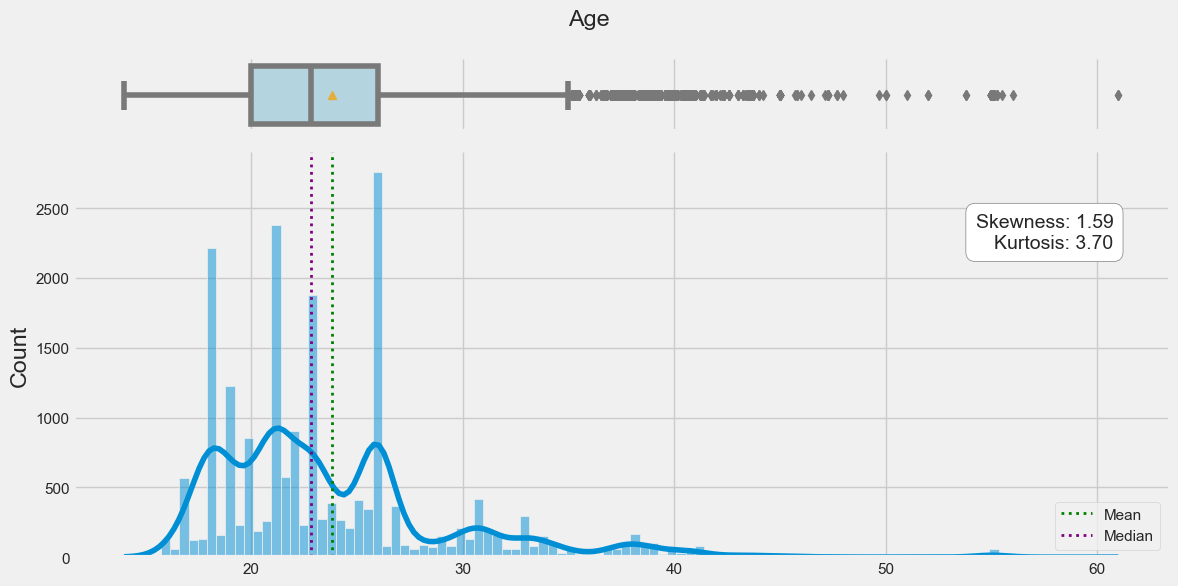

In [36]:
dist_plot(df, num_cols[1])

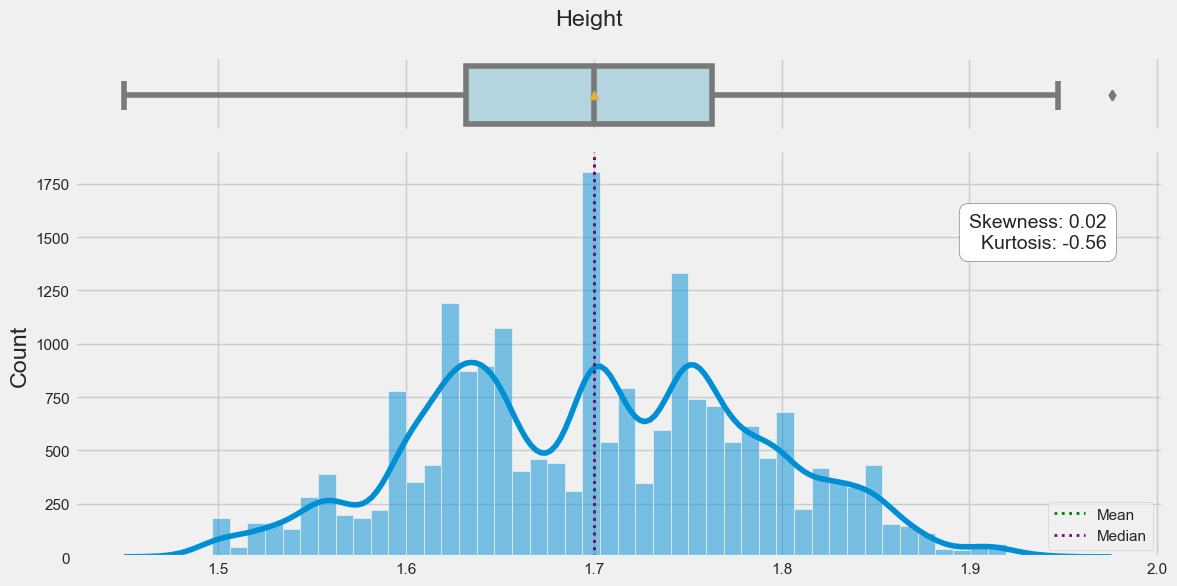

In [37]:
dist_plot(df, num_cols[2])

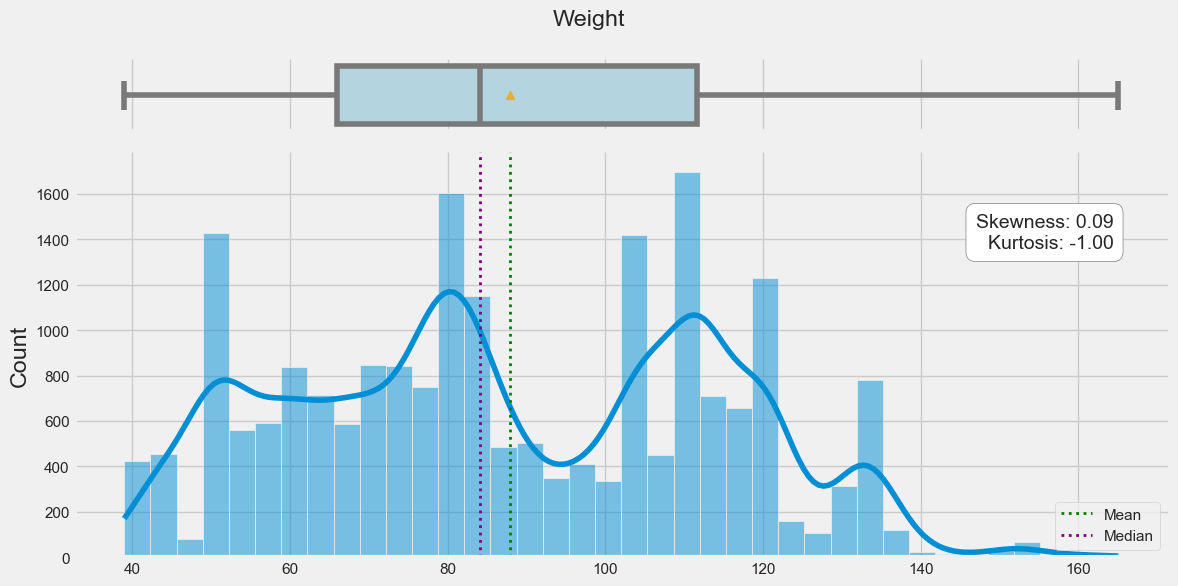

In [38]:
dist_plot(df, num_cols[3])

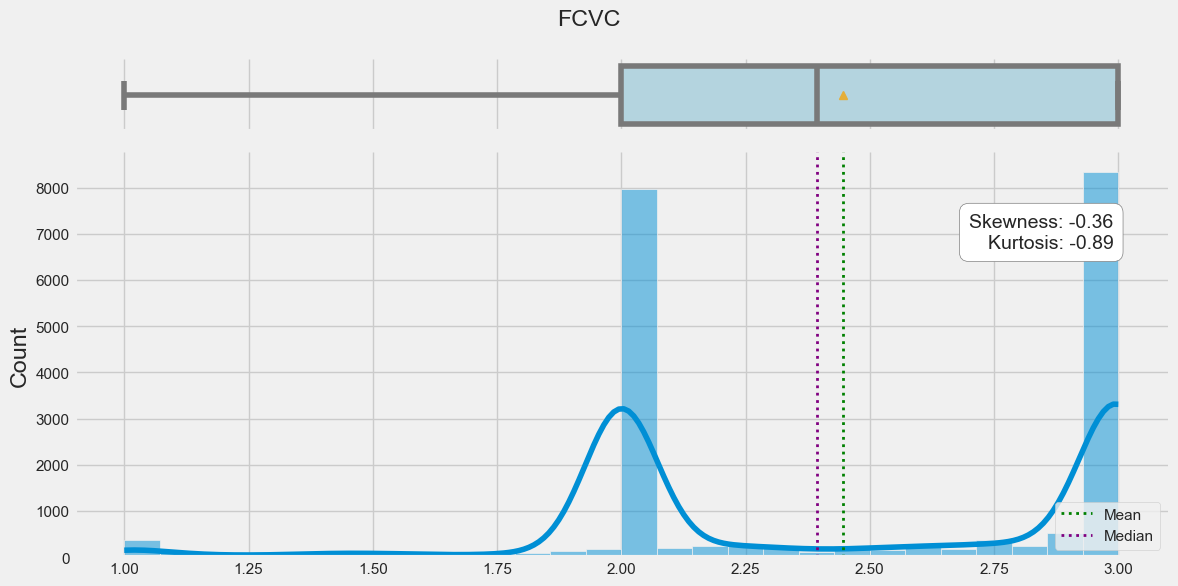

In [39]:
dist_plot(df, num_cols[4])

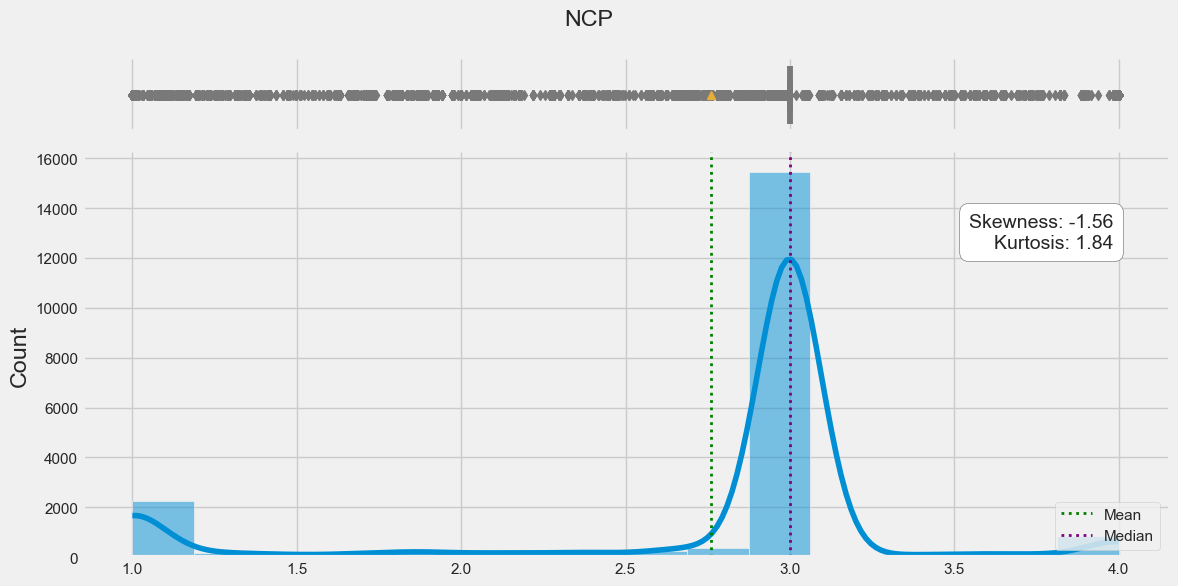

In [40]:
dist_plot(df, num_cols[5])

🔎 **Observations:** This should be turned into integer column as a person cannot have floating point number of main meals. 

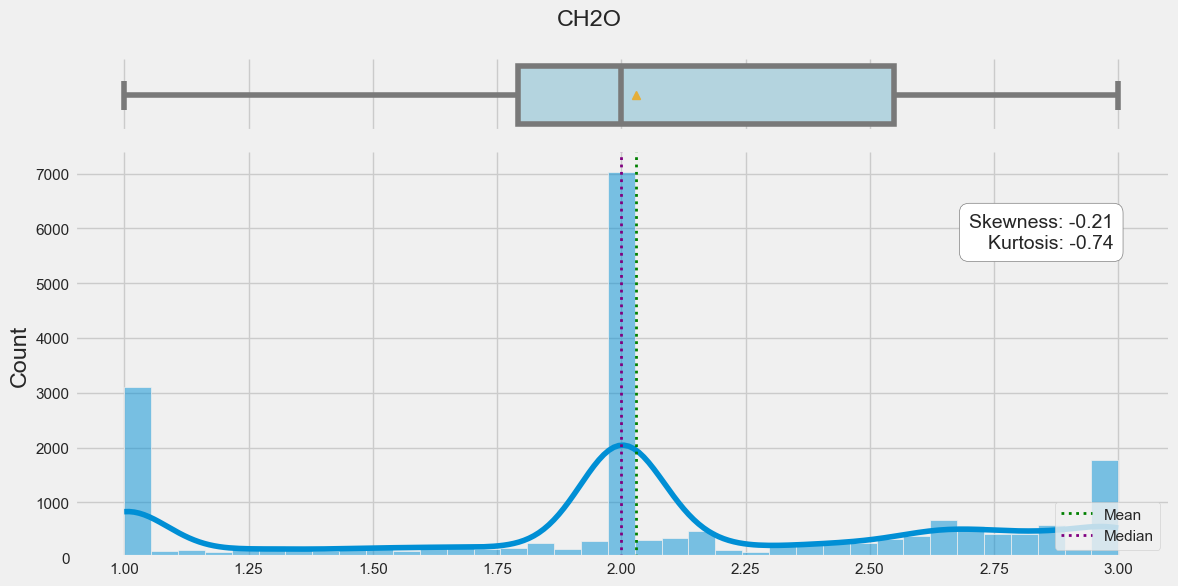

In [41]:
dist_plot(df, num_cols[6])

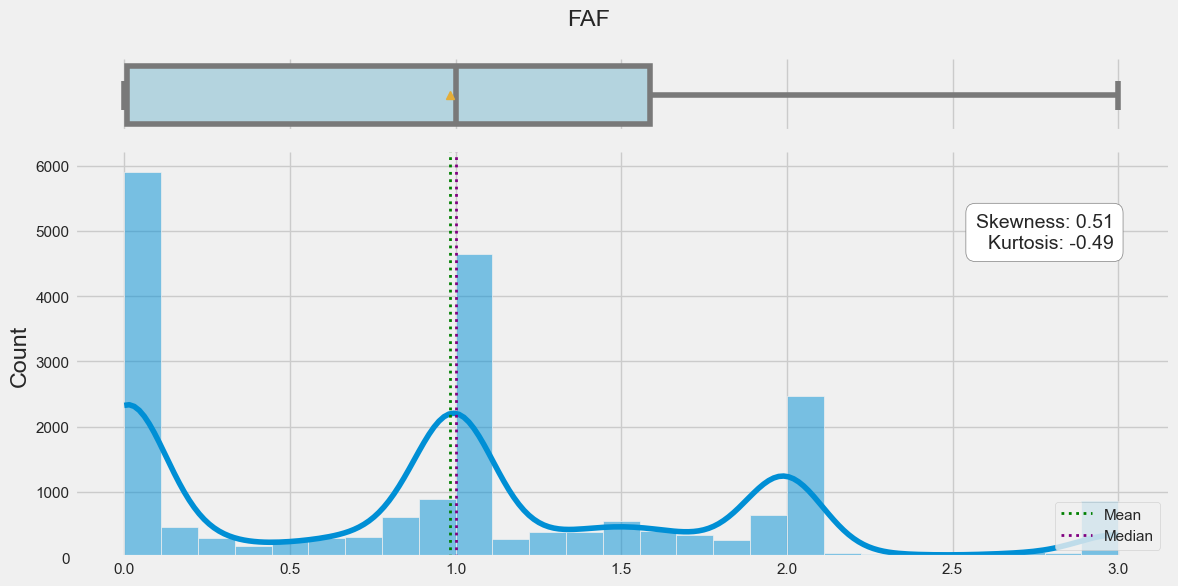

In [42]:
dist_plot(df, num_cols[7])

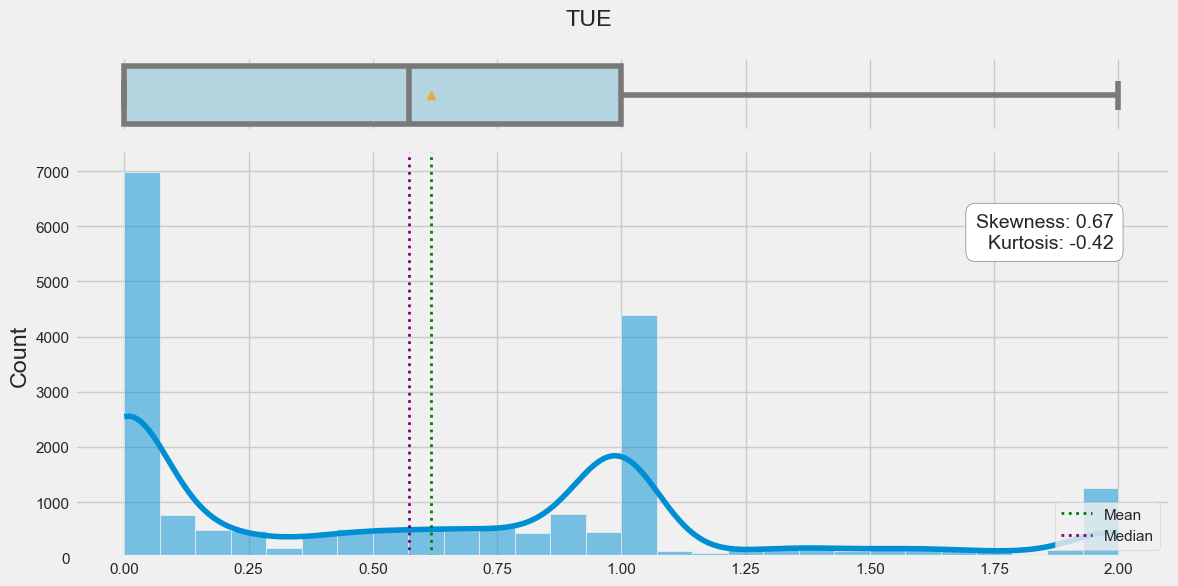

In [43]:
dist_plot(df, num_cols[8])

## Bivariate Analysis

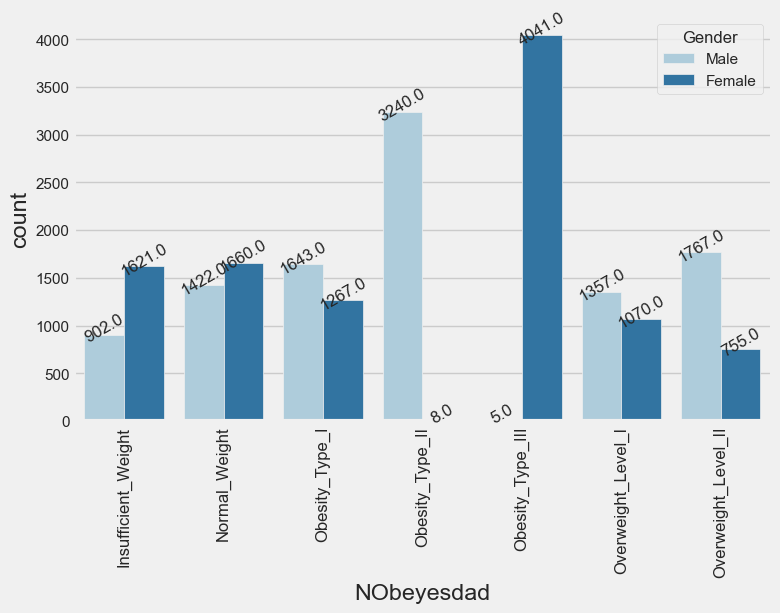

In [55]:
plot_counts(df, 'NObeyesdad', hue=cat_cols[0])

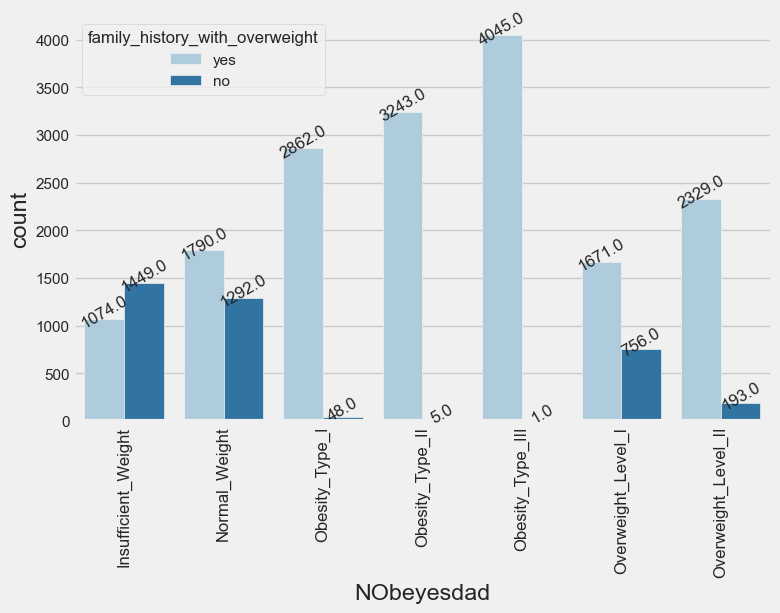

In [56]:
plot_counts(df, 'NObeyesdad', hue=cat_cols[1])

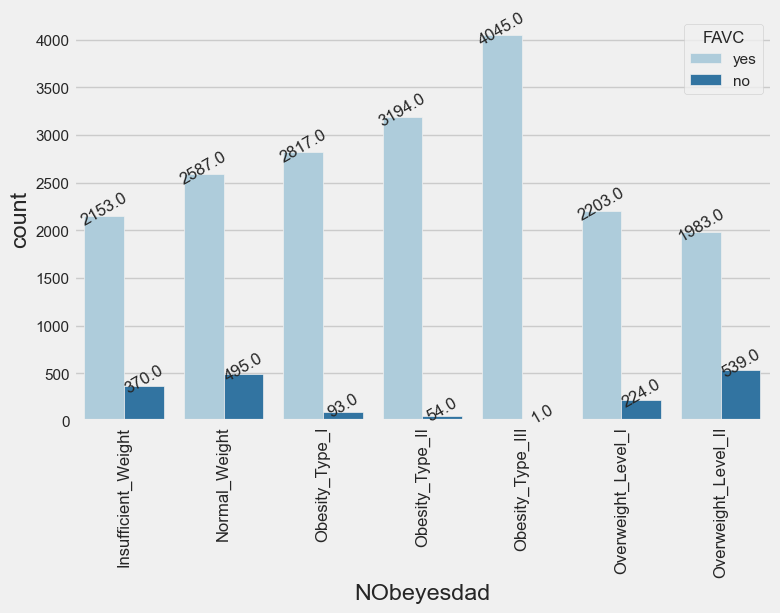

In [57]:
plot_counts(df, 'NObeyesdad', hue=cat_cols[2])

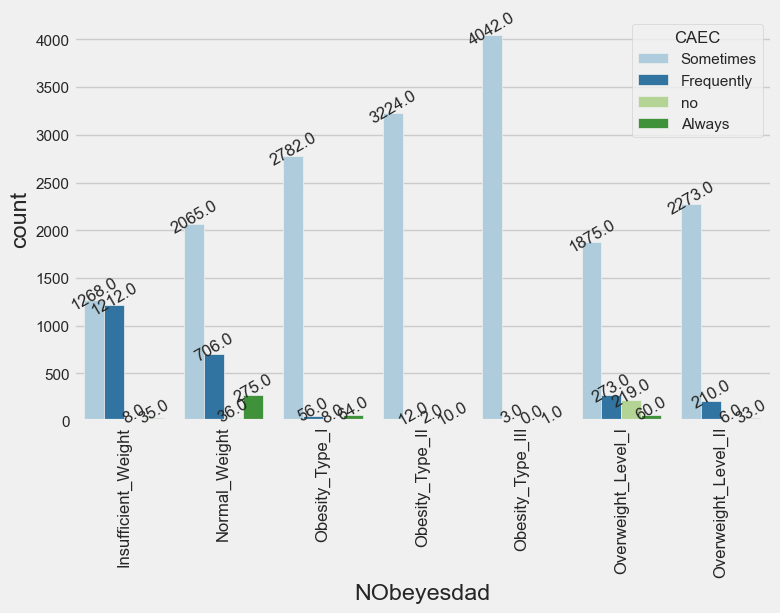

In [58]:
plot_counts(df, 'NObeyesdad', hue=cat_cols[3])

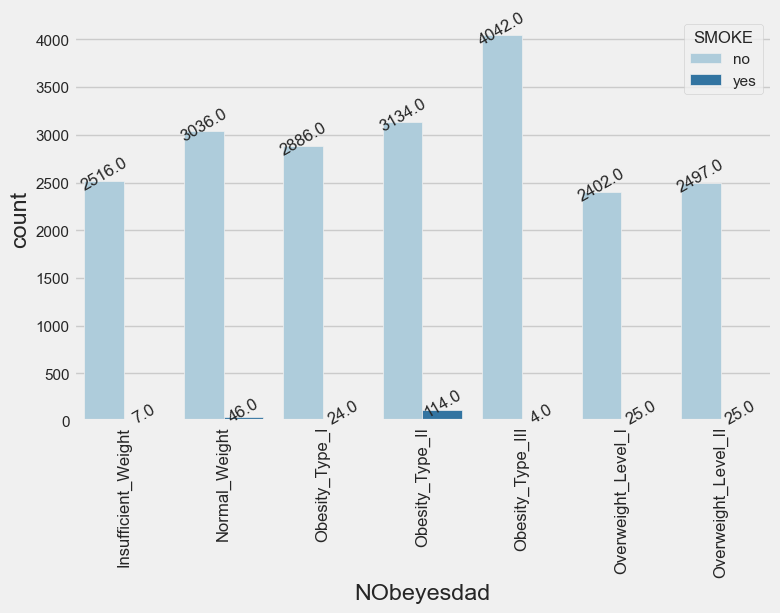

In [59]:
plot_counts(df, 'NObeyesdad', hue=cat_cols[4])

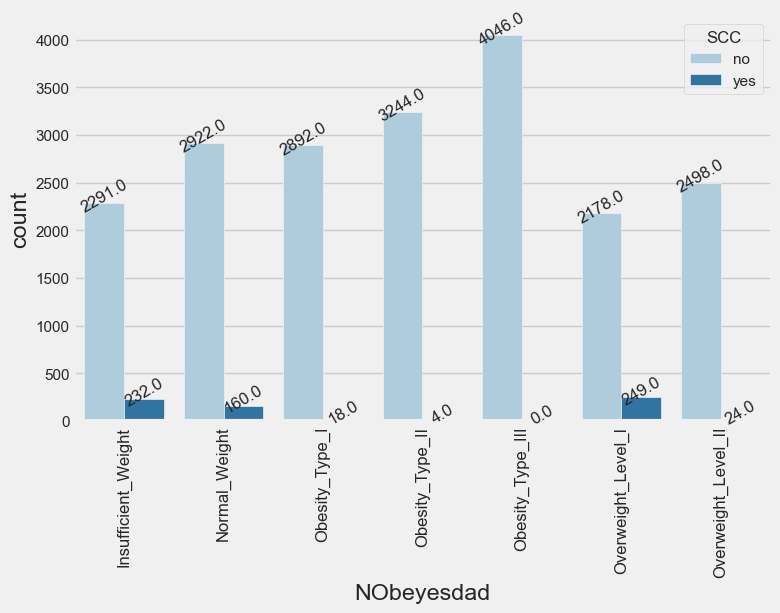

In [60]:
plot_counts(df, 'NObeyesdad', hue=cat_cols[5])

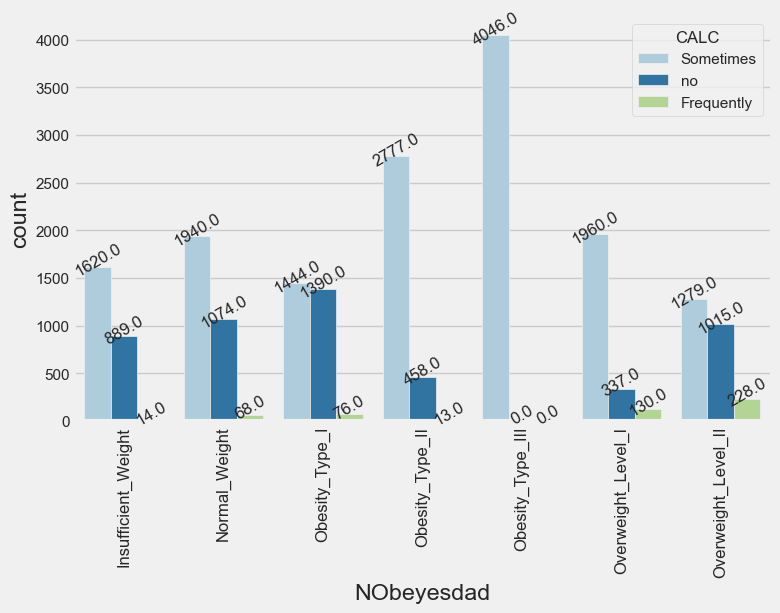

In [61]:
plot_counts(df, 'NObeyesdad', hue=cat_cols[6])

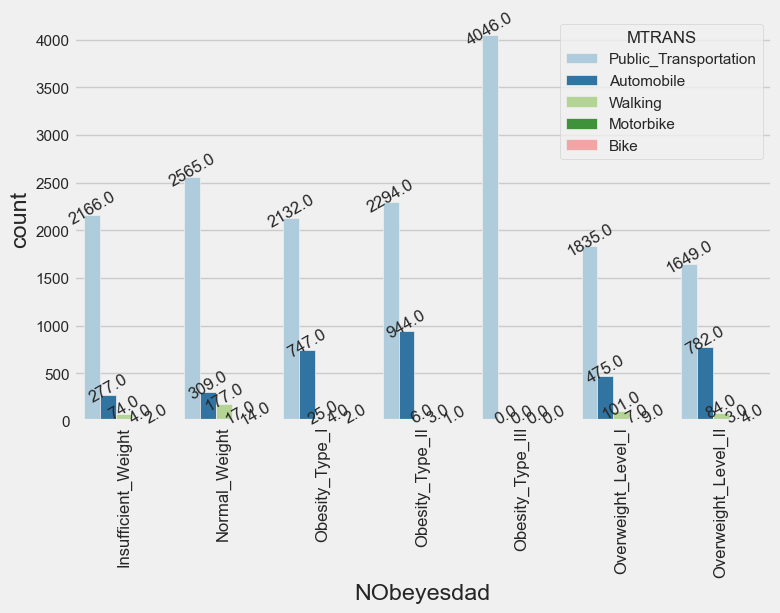

In [62]:
plot_counts(df, 'NObeyesdad', hue=cat_cols[7])

In [70]:
def box_plot(data, feature):
    plt.figure(figsize=(10, 6))
    sb.boxplot(data=data, x='NObeyesdad', y=feature)
    plt.xticks(rotation=90)
    plt.show()
    

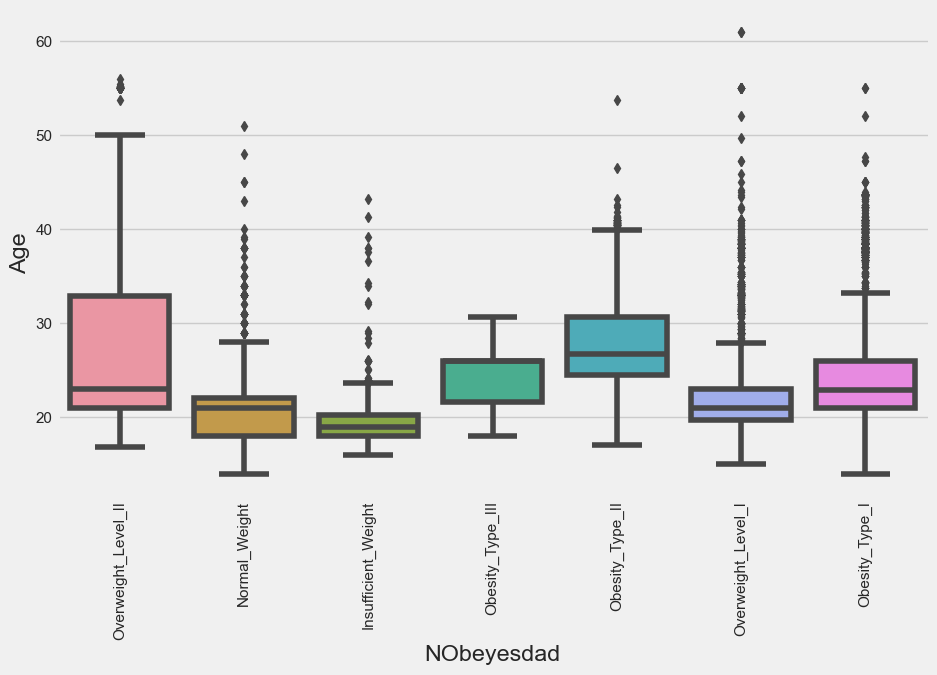

In [71]:
box_plot(df, num_cols[1])

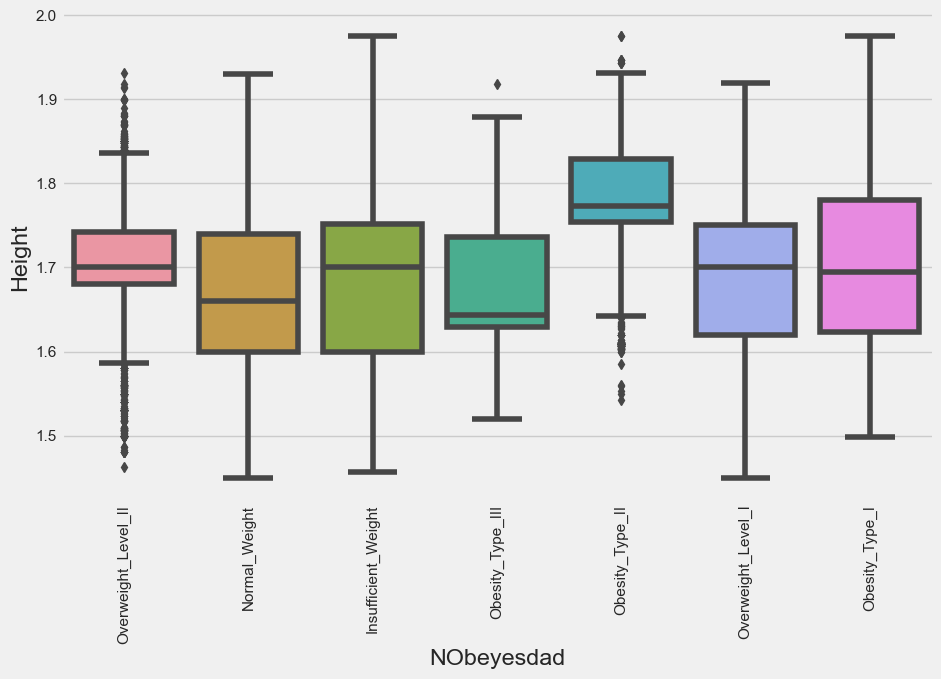

In [72]:
box_plot(df, num_cols[2])

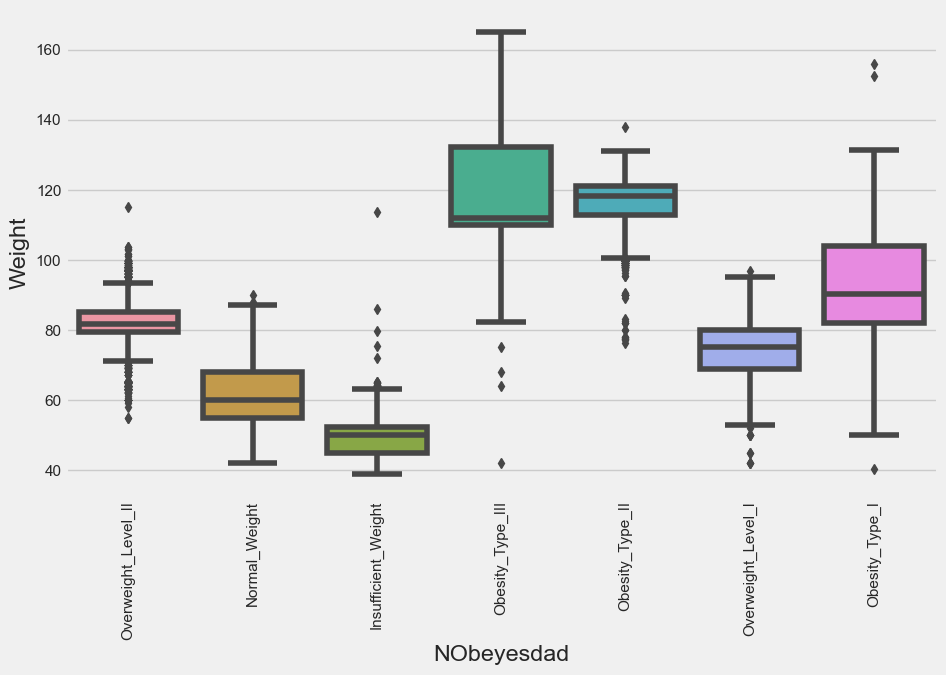

In [73]:
box_plot(df, num_cols[3])

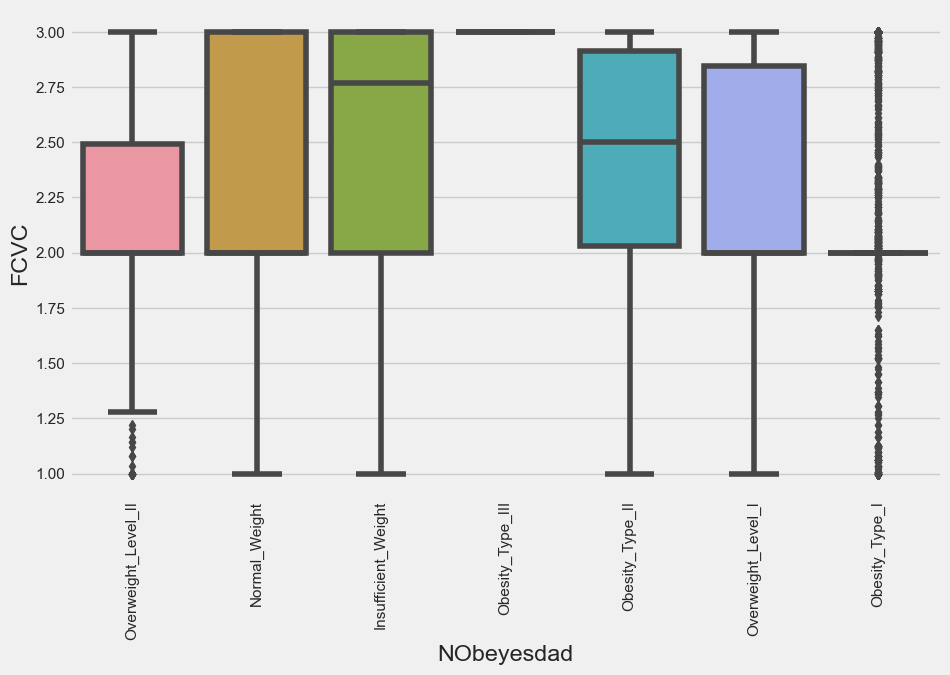

In [74]:
box_plot(df, num_cols[4])

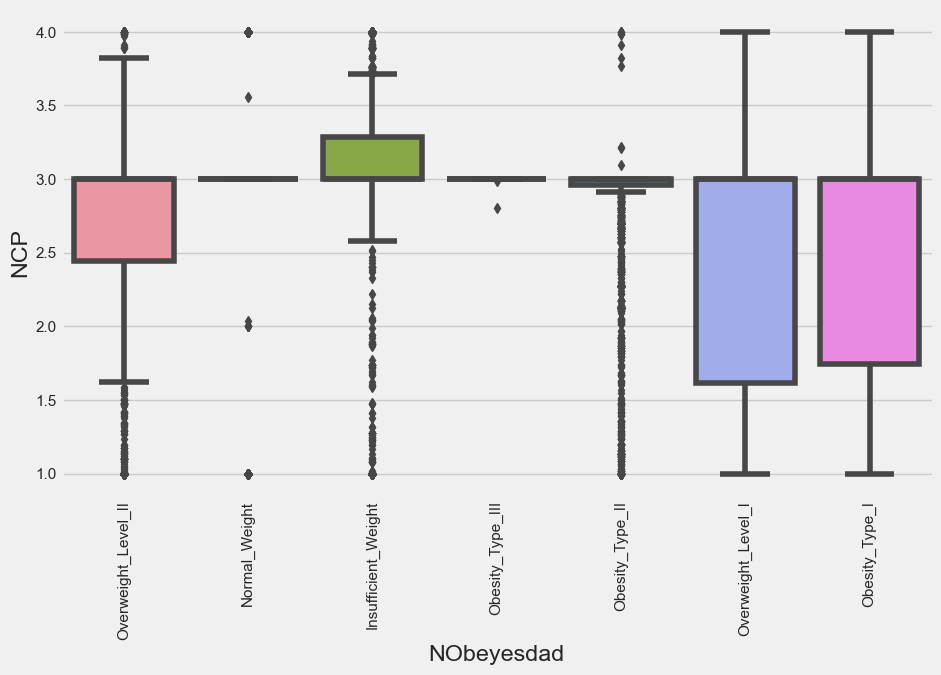

In [75]:
box_plot(df, num_cols[5])

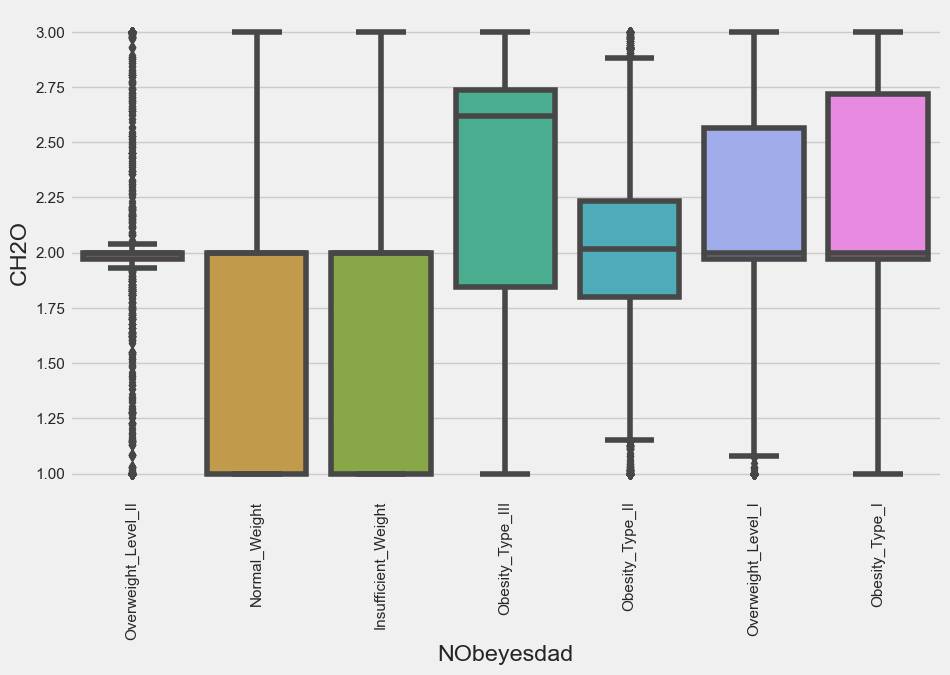

In [76]:
box_plot(df, num_cols[6])

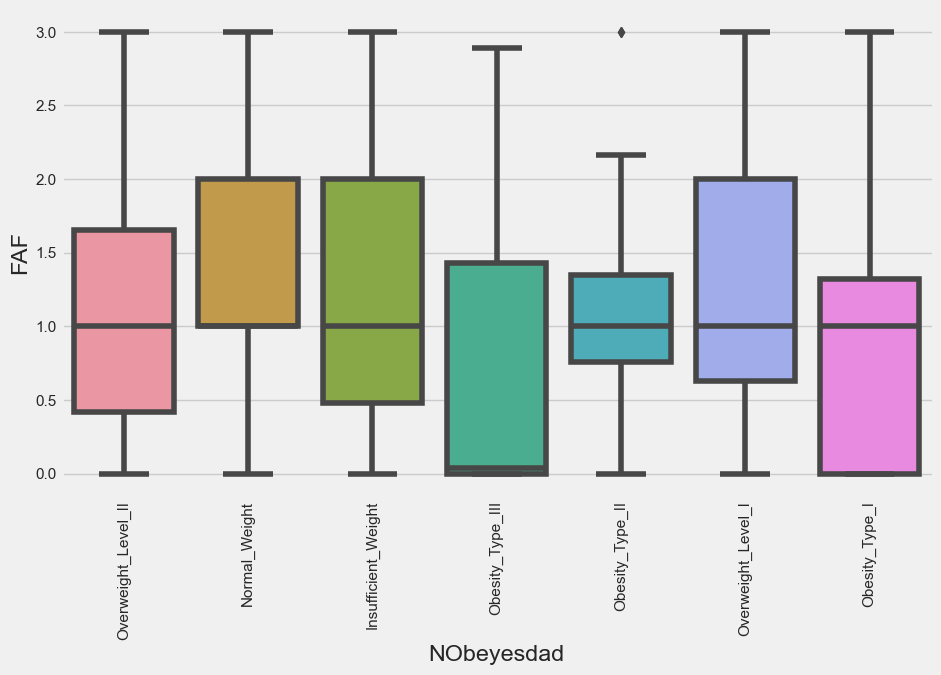

In [77]:
box_plot(df, num_cols[7])

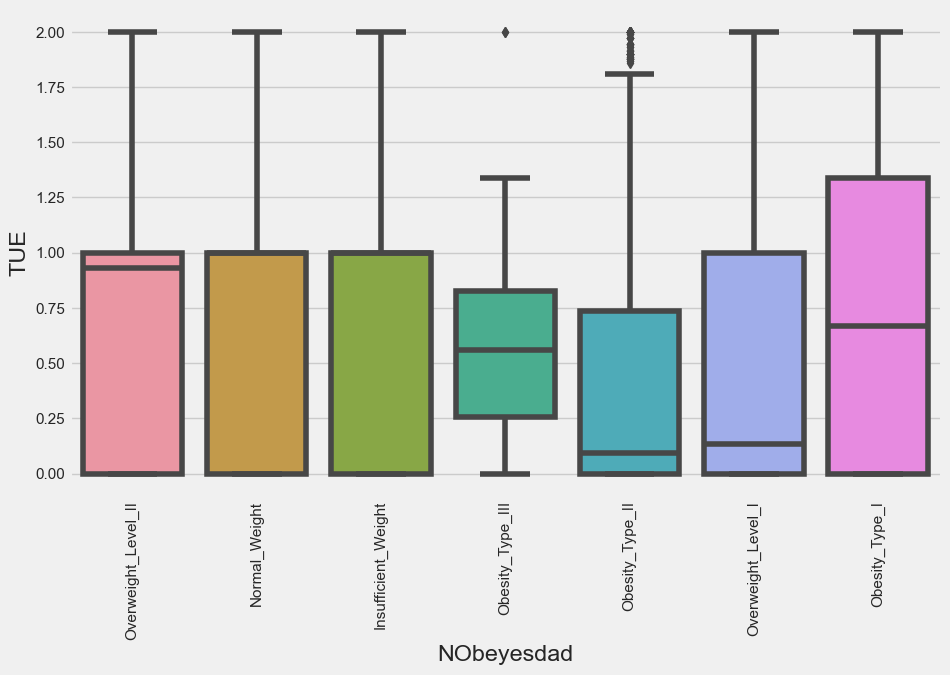

In [78]:
box_plot(df, num_cols[8])

## Multivariate Analysis

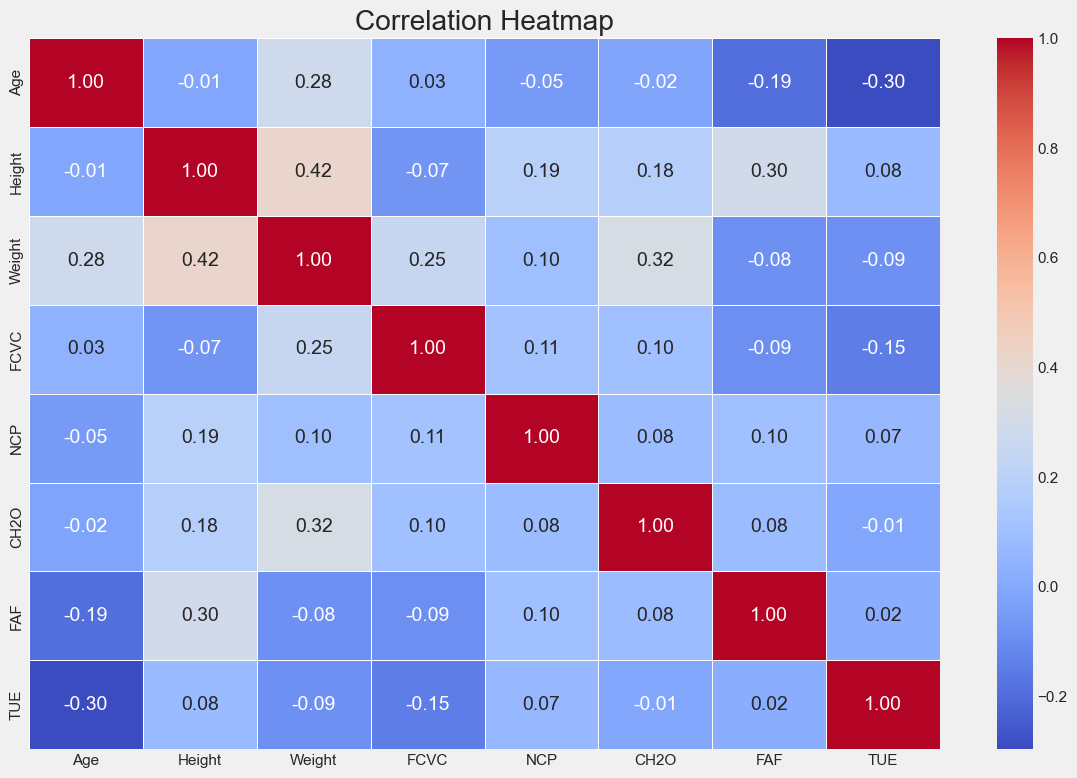

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.heatmap(df.drop('id', axis=1).drop(cat_cols, axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

🔎 **Observations:** 
- FCVC and Weight are highly correlated
- CH2O and Weight are highly correlated
- FAF and Height are highly correlated
- Weight and Height are highly correlated

# Next Steps

Prepare the data:
- Drop id column
- Make NCP an integer column
- Scale the data
